In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
link = "./runs.txt"
runs = []
cols = ["date"]
def r_file(link):
    file = open(link)
    run = []
    for line in file:
        if line == "\n" or line == "":
            continue
        if line[0] == '#':
            if run != []:
                runs.append(run.copy())
                run = []
        else:
            if '=' in line:
                value = line.split("= ")[1][:-1]
                if value[0] == '[':
                    if value[1] != ']':
                        value = [float(val) for val in value[1:-1].split(",")]
                    else:
                        value = []
                run.append(value)
            else:
                run.append(line)
        if line[0] != '#' and line[0] != 'O':
            col = line.split("=")[0].strip()
            if col != '' and not col.lower() in cols:
                cols.append(col.lower())
    if run:
        runs.append(run)

In [77]:
r_file("./results_archi_no_border/runsJB.txt")

In [78]:
r_file("./results_archi_no_border/runsNC.txt")

In [79]:
r_file("./results_archi_border/runsNC.txt")

In [80]:
r_file("./results_archi_border/runsJB.txt")

In [81]:
cols

['date',
 'num_channels',
 'pixel_depth',
 'num_labels',
 'training_size',
 'seed',
 'eval_batch_size',
 'batch_size',
 'num_epochs',
 'rotate_images',
 'restore_model',
 'train_predictions',
 'test_predictions',
 'enable_recording',
 'recording_step',
 'learning_rate',
 'last epoch',
 'validation f1 per epoch',
 'training f1 per epoch',
 'loss per recording step',
 'validation f1 score',
 'test f1 score',
 'conv_arch',
 'img_patch_size',
 'img_border',
 'img_total_size',
 'validation_train_perc',
 'validation_val_perc',
 'validation_test_perc']

In [82]:
runs_df = pd.DataFrame(columns=cols)

In [83]:
for i, run in enumerate(runs):
    runs_df.loc[i] = run

In [85]:
runs_df

,date,num_channels,pixel_depth,num_labels,training_size,seed,eval_batch_size,batch_size,num_epochs,rotate_images,...,loss per recording step,validation f1 score,test f1 score,conv_arch,img_patch_size,img_border,img_total_size,validation_train_perc,validation_val_perc,validation_test_perc
0,On Thu Dec 15 13:43:14 2016:\n,3,255,2,100,43212,64,64,100,False,...,"[3.2761817, 1.0140587, 0.81598103, 0.75997734,...",0.8313220286368399,0.8396449039217889,"[1.0, 1.0]",16,0,16,0.6,0.3,0.1
1,On Thu Dec 15 13:59:03 2016:\n,3,255,2,100,43212,64,64,100,False,...,"[22.295071, 0.93379974, 0.86258233, 0.79987955...",0.824814945364822,0.8371254787114214,"[2.0, 2.0, 4.0]",16,0,16,0.6,0.3,0.1
2,On Thu Dec 15 14:24:03 2016:\n,3,255,2,100,43212,64,64,100,False,...,"[287.63751, 0.7938875, 0.71987939, 0.70303428,...",0.8132720937598986,0.8228963938179737,"[2.0, 2.0, 4.0, 4.0]",16,0,16,0.6,0.3,0.1
3,On Thu Dec 15 13:42:37 2016:\n,3,255,2,100,43212,64,64,100,False,...,"[4.0745878, 0.98571509, 0.77867371, 0.66192508...",0.8312754015869942,0.8317967168877896,"[2.0, 2.0]",16,0,16,0.6,0.3,0.1
4,On Thu Dec 15 13:52:56 2016:\n,3,255,2,100,43212,64,64,100,False,...,"[38.701023, 0.95864356, 0.83271605, 0.77651215...",0.8365403154282188,0.8488087285682475,"[2.0, 4.0, 4.0]",16,0,16,0.6,0.3,0.1
5,On Thu Dec 15 14:02:54 2016:\n,3,255,2,100,43212,64,64,100,False,...,"[170.46692, 1.0427809, 0.93592256, 0.91700482,...",0.8112159911160466,0.8114392001860032,"[2.0, 4.0, 6.0]",16,0,16,0.6,0.3,0.1
6,On Thu Dec 15 14:18:56 2016:\n,3,255,2,100,43212,64,64,100,False,...,"[2649.0049, 0.80747092, 0.79388952, 0.74879164...",0.7905989750160154,0.8051052086926527,"[2.0, 4.0, 4.0, 6.0]",16,0,16,0.6,0.3,0.1
7,On Thu Dec 15 15:03:32 2016:\n,3,255,2,100,43212,64,64,100,False,...,"[24.233192, 4.7921515, 3.0561287, 2.1033263, 1...",0.8730158730158729,0.877349049260536,"[2.0, 2.0]",16,16,48,0.6,0.3,0.1
8,On Thu Dec 15 16:03:41 2016:\n,3,255,2,100,43212,64,64,100,False,...,"[242.73831, 4.0606999, 3.5490918, 3.265013, 2....",0.8512409676405908,0.8809389459428958,"[2.0, 4.0, 4.0]",16,16,48,0.6,0.3,0.1
9,On Thu Dec 15 16:45:36 2016:\n,3,255,2,100,43212,64,64,100,False,...,"[1552.9519, 4.2884426, 3.8752682, 3.7270119, 3...",0.8606519026824704,0.8777992497442311,"[2.0, 4.0, 6.0]",16,16,48,0.6,0.3,0.1


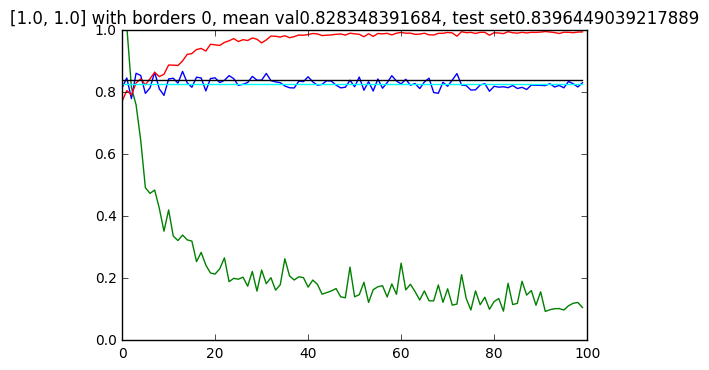

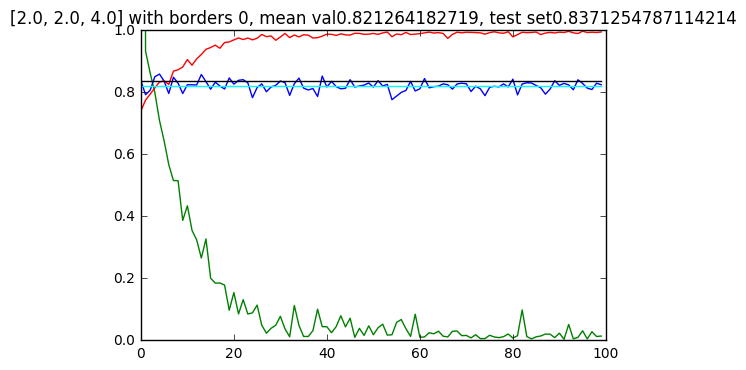

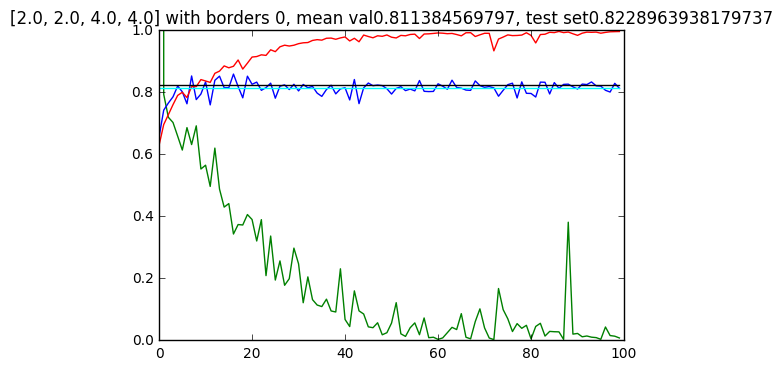

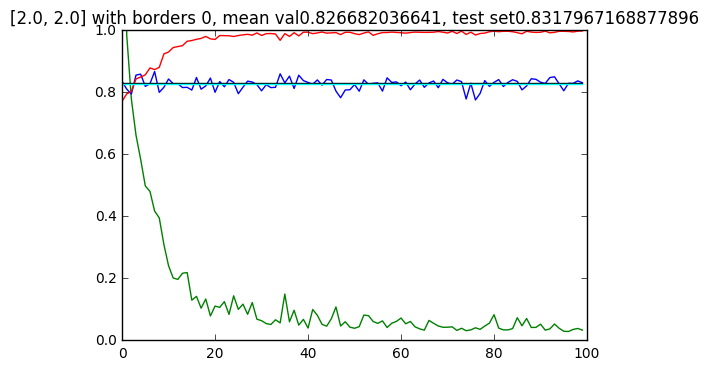

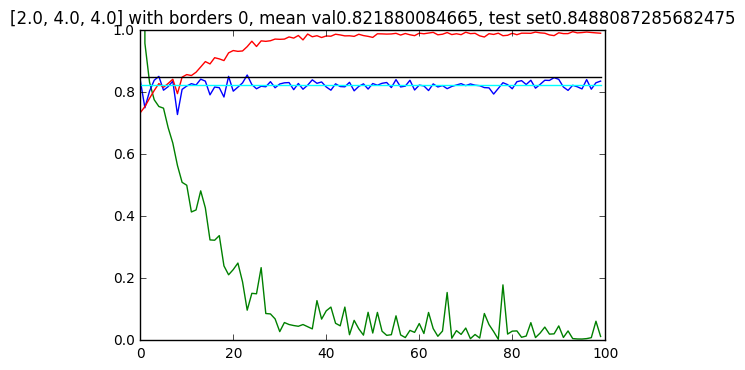

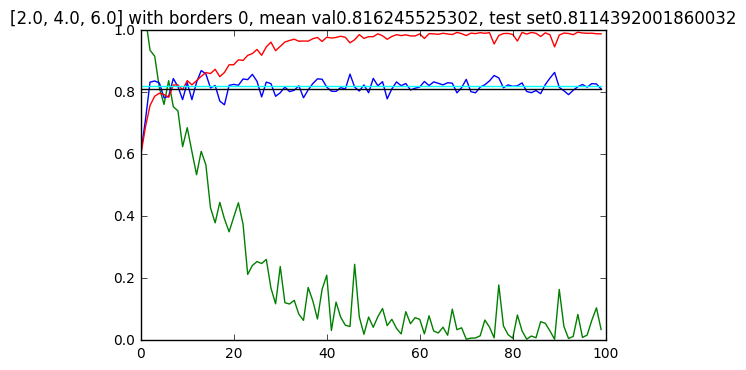

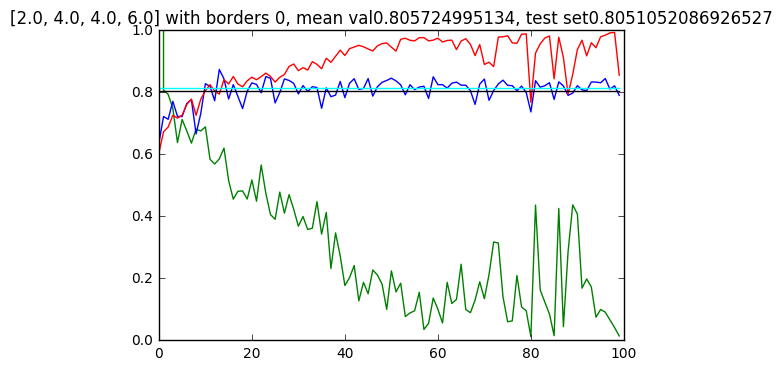

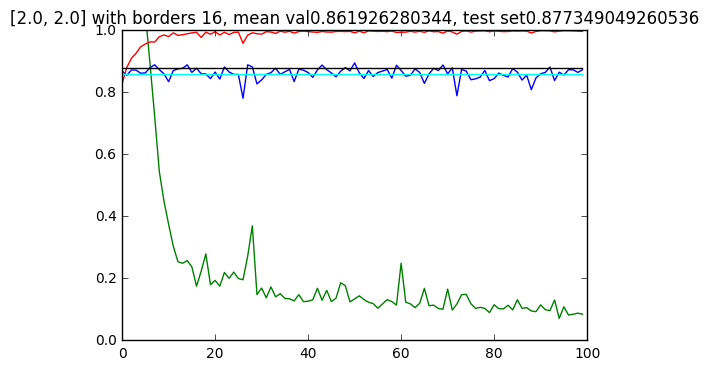

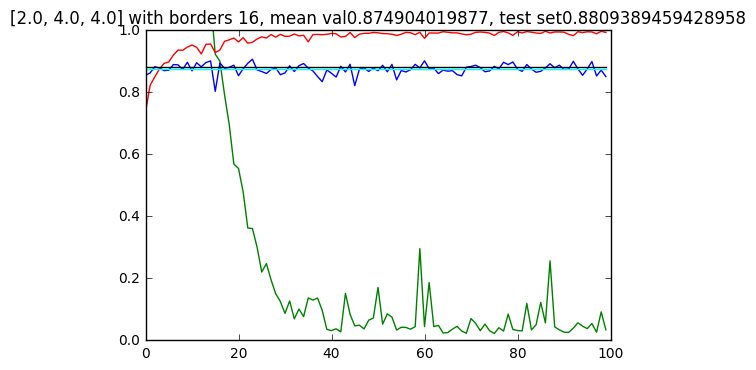

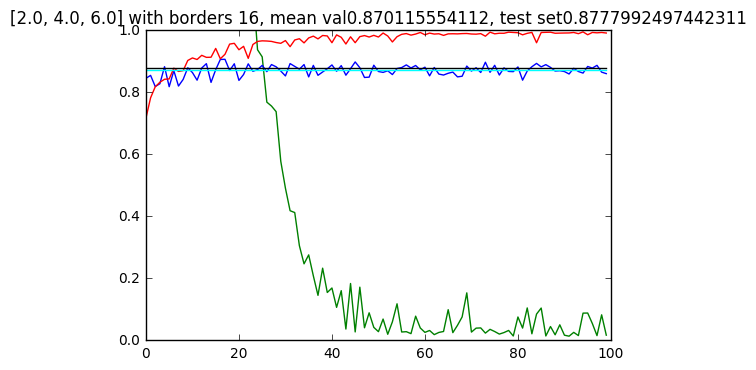

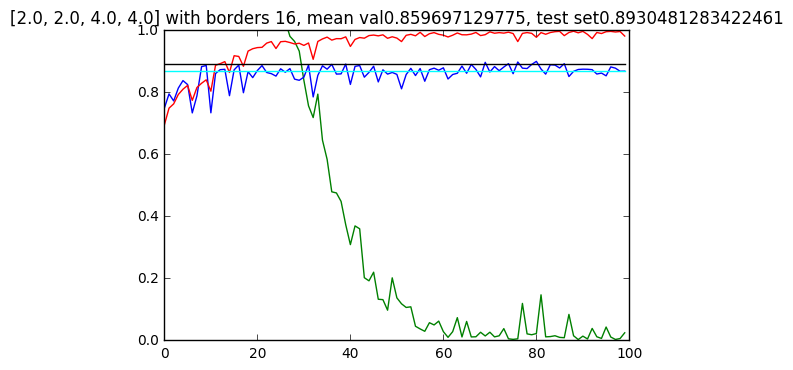

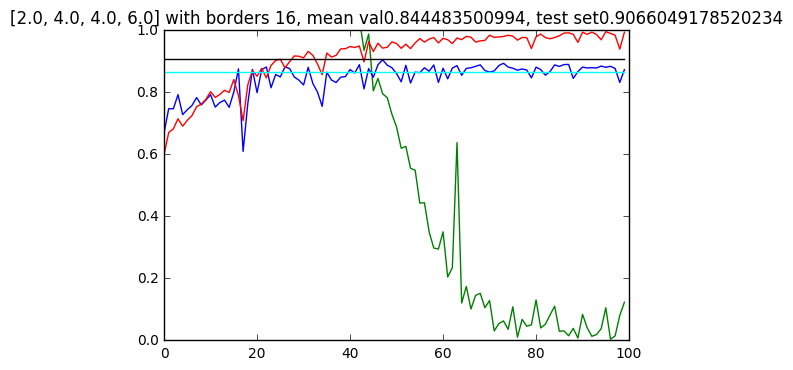

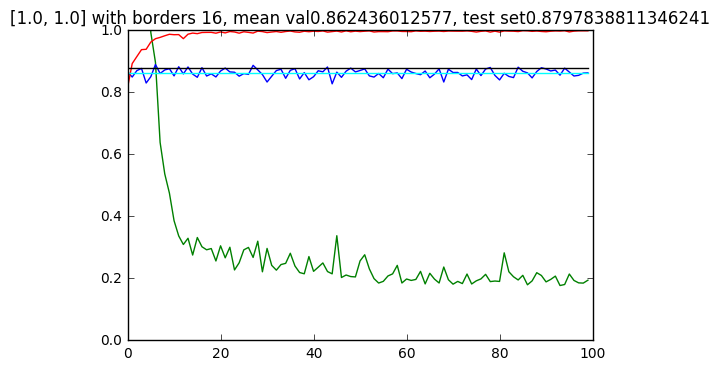

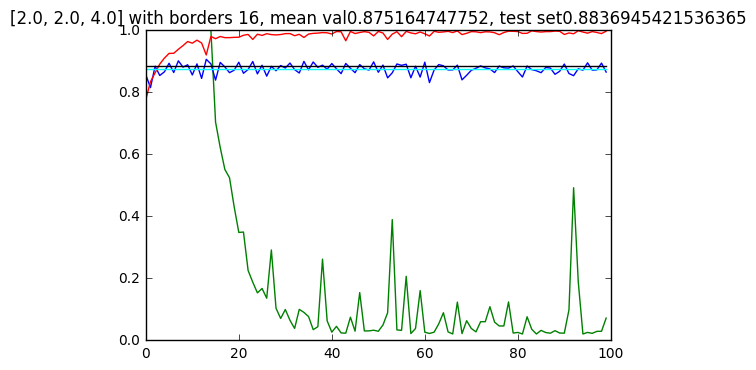

In [96]:
df = runs_df[["conv_arch", "loss per recording step","validation f1 per epoch", "training f1 per epoch", "img_border", "test f1 score"]]

for a in df.values:
    plt.ylim(0,1)
    plt.title(str(a[0]) + " with borders " + str(a[4]) + ", mean val " + str(np.mean(a[2])) + ", test set " + str(a[5]))
    plt.plot(a[1], "g")
    plt.plot(a[2], "b")
    plt.plot(a[3], "r")
    plt.plot([a[5]]*100, "black")
    plt.plot([np.mean(a[2][20:])]*100, "cyan")
    plt.show()